# Lab Assignment 2 – Scarlett  200016841 
**(The URL of the recently created GitHub repository (Not MYFirstRepo, orPY4SA_Course)**

## Assignment Tasks

**PYTHON BASICS**

**Task 1:**
Create an If...Else statement that will test whether a number is divisible by three. "YOUR VALUE is divisible by 3" should be printed if the value is divisible by three. "YOUR VALUE is not divisible by three" should be printed if it is not divisible by three. Test the statement on a numeric variable. Upper case text in the print statement should be replaced with the tested number.

In [13]:
number = 12  # replace with your own value to be tested

if number % 3 == 0:
    print(str(number) + " is divisible by 3")
else:
    print(str(number) + " is not divisible by 3")

12 is divisible by 3.


**Task 2** Create an If...Else statement that will test whether a type of fruit, represented as a text string, is in a list of acceptable fruits (apple, orange, pear, kiwi, or strawberry). If the fruit is on the list, the following should be printed: "YOUR FRUIT is acceptable." If not, then the following should be printed: "YOUR FRUIT is not acceptable." Upper case text in the print statement should be replaced with the tested fruit.

In [20]:
fruit = "banana"  # replace with your own fruit within "" to be tested
acceptable_fruits = ["apple", "orange", "pear", "kiwi", "strawberry"]

if fruit in acceptable_fruits:
    print(str(fruit) + " is acceptable")
else:
    print(str(fruit) + " is not acceptable")

banana is not acceptable


**Task 3** Create a function to calculate the distance between two coordinates using the haversine formula. Write the following formula where the input parameters are a pair of coordinates as two lists.

In [2]:
#Import necessary individual functions from math module
from math import radians, sin, cos, sqrt, atan2

#Define the function
def haversine(coord1, coord2):
    
    # Earth radius in kilometers
    R = 6371
    
    # Convert coordinates to radians
    lat1 = radians(coord1[0])
    lon1 = radians(coord1[1])
    lat2 = radians(coord2[0])
    lon2 = radians(coord2[1])
    
    # Calculate differences between coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    
    return distance

# Input coordinates here
coord1 = [40, -74]
coord2 = [34, 118]

# Calculate distance using haversine formula
distance = haversine(coord1, coord2)

print(f"The distance between Coordinates 1 and Coordinates 2 is {distance:.2f} km.")

The distance between Coordinates 1 and Coordinates 2 is 11694.87 km.


**PANDAS AND NUMPY**

In [3]:
#Import NumPy and Pandas to use in code
import numpy as np
import pandas as pd

In [84]:
#Import the data file
trees_df = pd.read_csv("portland_park_trees.csv", sep=",", header=0, encoding="ISO-8859-1")
trees_df.head(3)

,fid,OBJECTID,Inventory_,Species,DBH,Condition,TreeHeight,CrownWidth,CrownWid_1,CollectedB,...,Genus,Common_nam,Genus_spec,Functional,Size,Native,Edible,Nuisance,Origin,Species_fa
0,1,426,2017/05/09,PSME,37.4,Fair,105.0,44.0,57.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...
1,2,427,2017/05/09,PSME,32.5,Fair,94.0,49.0,45.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...
2,3,428,2017/05/09,CRLA,9.7,Fair,23.0,28.0,27.0,staff,...,Crataegus,Lavalle hawthorn,Crataegus x lavalleei,BD,S,No,NaN,NaN,North America - a hybrid between a Mexican and...,"Like most hawthorns, the tree has stout thorns..."


In [46]:
#See how many rows and columns are in the dataframe: 25,534 rows and 40 columns
trees_df.shape

(25534, 40)

**Question 1:** How many trees are of the Quercus or Acer genus?

In [58]:
# Select the rows where the genus is Quercus or Acer
quercus_acer = trees_df[trees_df['Genus'].isin(['Quercus', 'Acer'])]

# Count the number of rows in the resulting dataframe
num_quercus_acer = len(quercus_acer)

# Print the result
print("Number of Quercus or Acer trees:", num_quercus_acer)

Number of Quercus or Acer trees: 5675


**Question 2:** How many trees are of the Quercus or Acer genus and have a DBH larger than 50 inches?

In [78]:
#Make a query for Quercus and Acer with DBH larger than 50.
num_quercus_acer50 = quercus_acer.query('DBH > 50')

#Count the number of rows in the resulting dataframe
quercus_acer_50 = (len(num_quercus_acer50))

#Print the result
print("Number of Quercus or Acer genus that have a DBH larger than 50 inches:", quercus_acer_50)

Number of Quercus or Acer genus that have a DBH larger than 50 inches: 124


**Question 3:** Which genus has the highest mean DBH of the following genera: Quercus, Acer, or Fraxinus?

In [73]:
# Create a list of the three chosen genera
genera = ['Quercus', 'Acer', 'Fraxinus']

# Filter the dataset to only include the chosen genera
chosen_data = trees_df[trees_df['Genus'].isin(genera)]

# Calculate the mean DBH for each genus
mean_diameter = chosen_data.groupby('Genus')['DBH'].mean()

# Determine which genus has the highest mean DBH
highest_mean_DBH = mean_diameter.idxmax()

#Print the result
print("The genus with the highest mean DBH is:", highest_mean_DBH)

The genus with the highest mean DBH is: Quercus


**Question 4:** How many different species of trees are recorded in the Acer genus?

In [99]:
# Filter the dataset to only include the Acer genus
acer_data = trees_df[trees_df["Genus"] == "Acer"]
acer_data.head(5)

# Count the number of occurrences of each species in the Acer genus
species_count = acer_data['Species'].value_counts()

# Count the number of unique species in the Acer genus
num_species = len(species_count)

#Print the result
print("The number of different species in the Acer genus is:", num_species)

The number of different species in the Acer genus is: 20


**Question 5:**

In [113]:
#Import the data file
cities_df = pd.read_csv("world_cities.csv", sep=",", header=0, encoding="ISO-8859-1")
cities_df.head(3)

,city,country,pop,lat,lon,capital
0,'Abasan al-Jadidah,Palestine,5629,31.31,34.34,0
1,'Abasan al-Kabirah,Palestine,18999,31.32,34.35,0
2,'Abdul Hakim,Pakistan,47788,30.55,72.11,0


**a.** Calculate a new column named "pop_M" (population in millions), by transforming the "pop" (population) column.

In [114]:
#Create a new column "pop_M" with population values in millions
cities_df['pop_M'] = cities_df['pop'] / 1000000

# Print the updated DataFrame
cities_df.head(3)

,city,country,pop,lat,lon,capital,pop_M
0,'Abasan al-Jadidah,Palestine,5629,31.31,34.34,0,0.005629
1,'Abasan al-Kabirah,Palestine,18999,31.32,34.35,0,0.018999
2,'Abdul Hakim,Pakistan,47788,30.55,72.11,0,0.047788


**b.** Remove the original "pop" column.

In [115]:
cities_df = cities_df.drop(columns=['pop'])

# Print the updated DataFrame
cities_df.head(3)

,city,country,lat,lon,capital,pop_M
0,'Abasan al-Jadidah,Palestine,31.31,34.34,0,0.005629
1,'Abasan al-Kabirah,Palestine,31.32,34.35,0,0.018999
2,'Abdul Hakim,Pakistan,30.55,72.11,0,0.047788


**c.** Choose/subset a city that starts with the same letter as your first name (for example,
"Mexico City" if your first name is Michael).

In [120]:
#Choose city that starts with the letter 's' by looking at raw csv - i chose Saa, Cameroon.
#Subset the rows where city is Saa
saa_df = cities_df[cities_df['city'] == 'Saa']

#Print the updated DataFrame
print(saa_df)

      city   country   lat    lon  capital    pop_M
31949  Saa  Cameroon  4.37  11.45        0  0.00586


**d.** 
Subset the five biggest (i.e., largest population sizes) cities from the country where your
selected city is.

In [128]:
#Select the country where selected city is
country = "Cameroon" 

#Subset the 5 biggest cities in Cameroon
cameroon = cities_df[cities_df['country'] == country]
top5 = cameroon.nlargest(5, 'pop_M')

#Print result
print(top5)

           city   country    lat    lon  capital     pop_M
9738     Douala  Cameroon   4.06   9.71        0  1.371448
42193   Yaounde  Cameroon   3.87  11.52        1  1.344617
18967  Kousseri  Cameroon  12.08  15.03        0  0.476566
12226    Garoua  Cameroon   9.30  13.39        0  0.461337
3115    Bamenda  Cameroon   5.96  10.15        0  0.419393


**PYTHON DATA VISUALISATION**

**Graph 1:** Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis and tree height mapped to the y-axis (Hint: You will need to use the “Genus”, “DBH”, and “TreeHeight” attributes.).

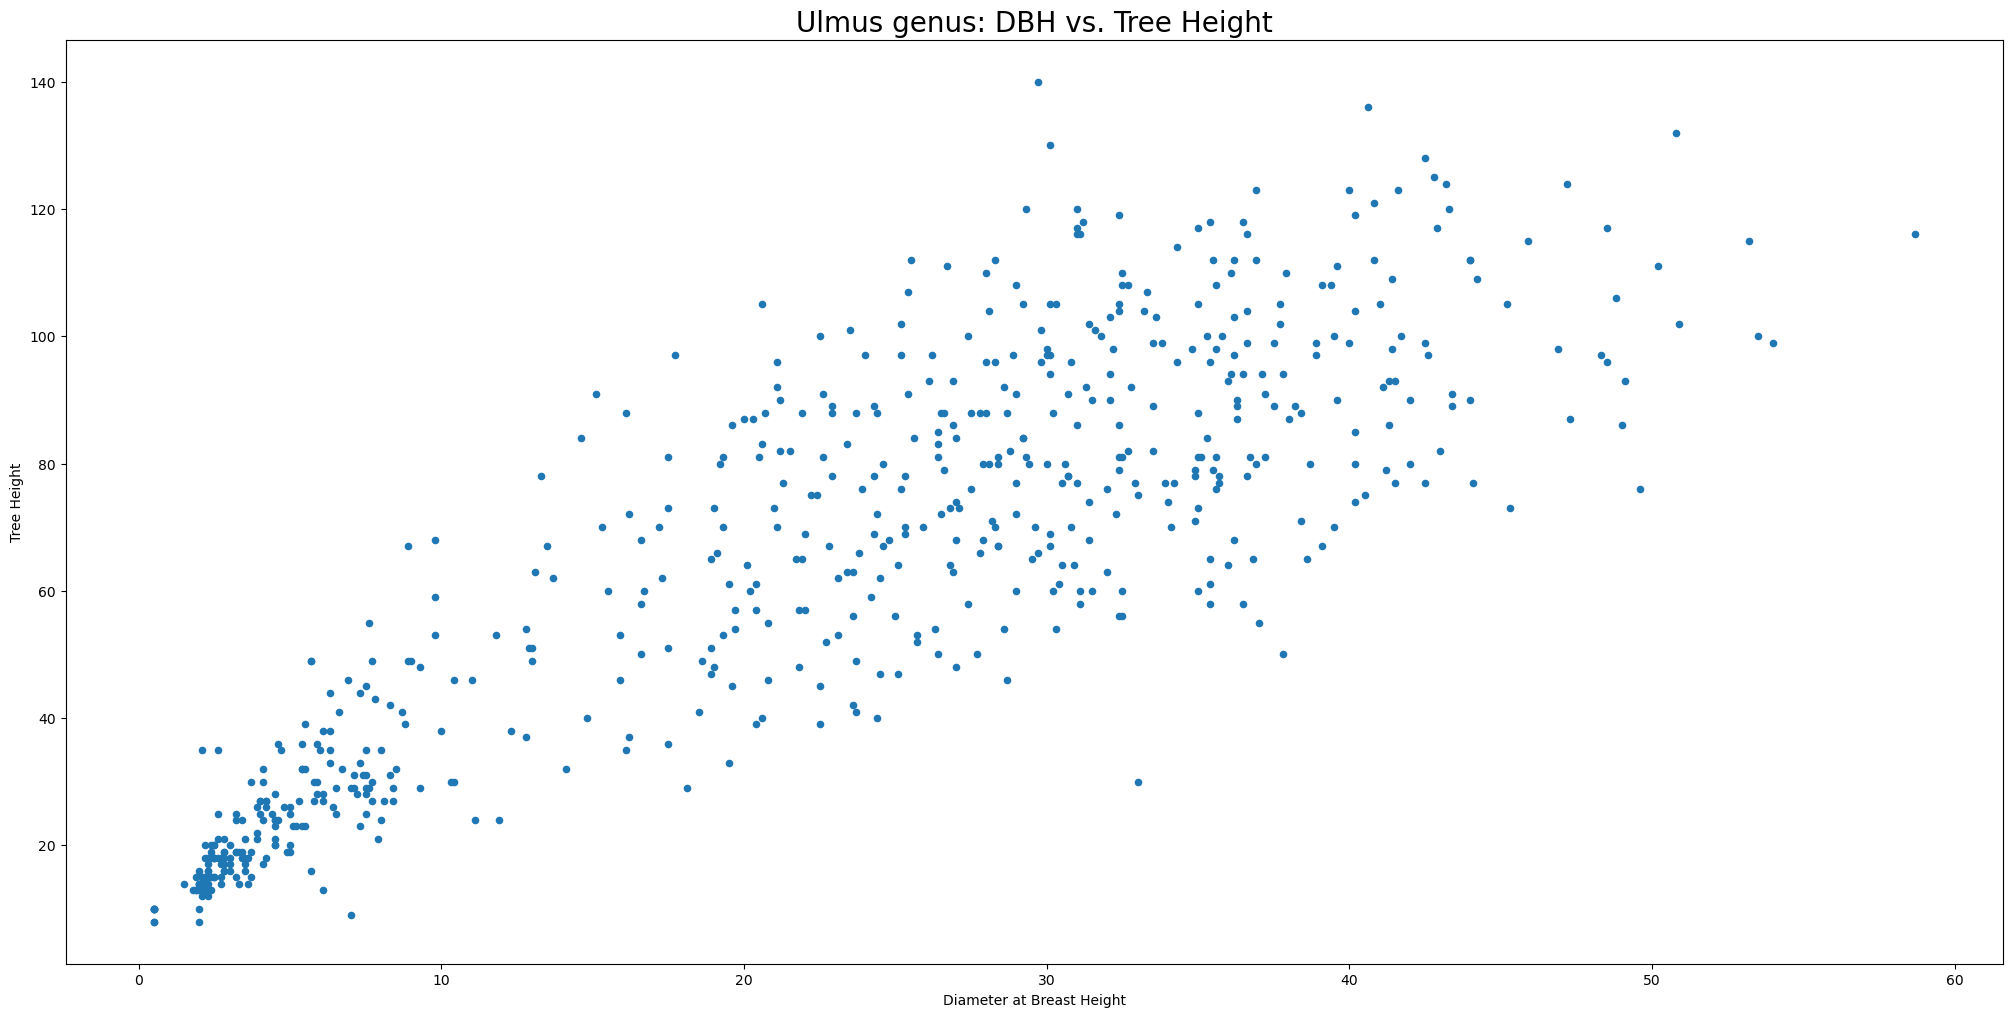

In [253]:
import pandas as pd
import matplotlib.pyplot as plt

#Import the dataset
trees = pd.read_csv("portland_park_trees.csv")

#Subset the dataset for Ulmus genus
ulmus = trees[(trees["Genus"]=="Ulmus")]

#Create the scatterplot using Panda library
ulmus_plot = ulmus.plot.scatter(x="DBH", y="TreeHeight")
ulmus_plot.set_xlabel("Diameter at Breast Height")
ulmus_plot.set_ylabel("Tree Height")
ulmus_plot.set_title("Ulmus genus: DBH vs. Tree Height", fontsize=20, color="#000000")
plt.show(ulmus_plot)

**Graph 2:** Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis, tree height mapped to the y-axis, and tree species mapped to hue (Hint: You will need to use the “Genus”, “Genus_spec”, “DBH”, and “TreeHeight” attributes.)

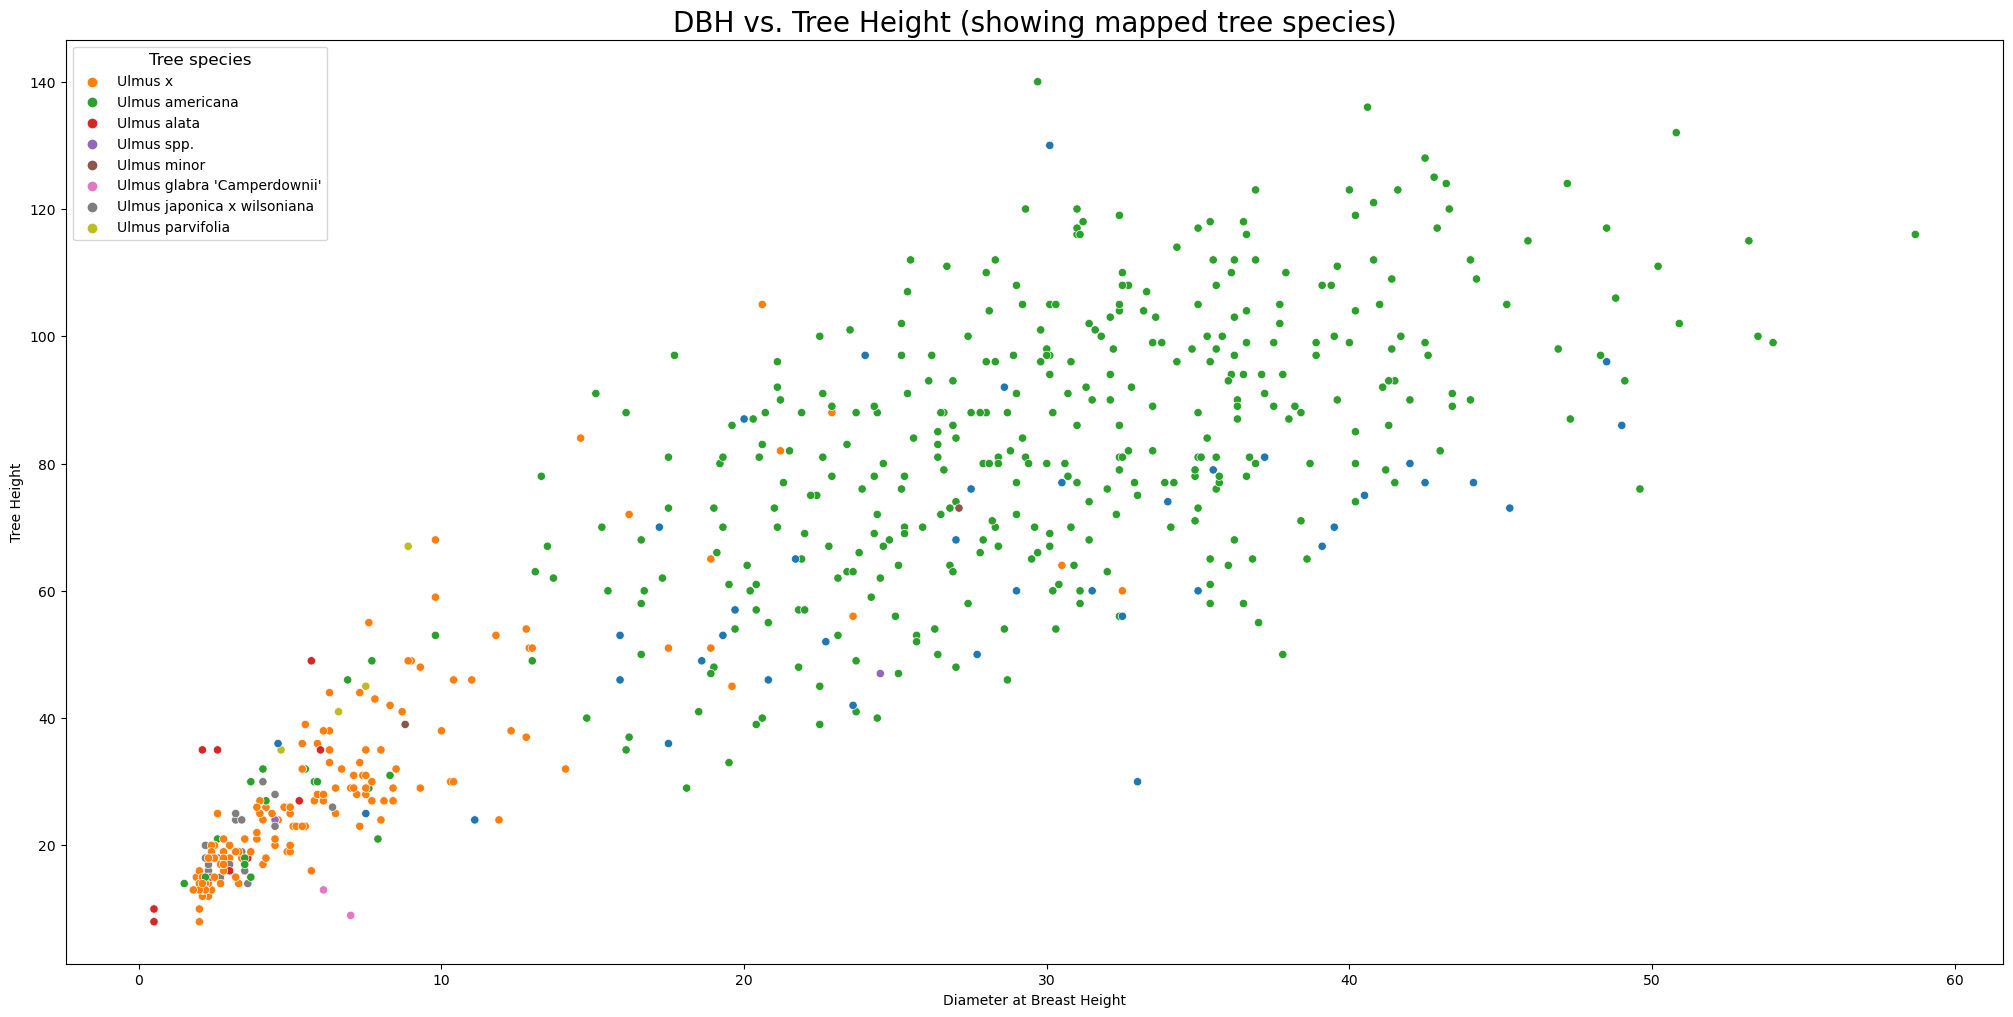

In [254]:
import pandas as pd
import seaborn as sns

#Create a scatter plot using Seaborn library
hue_plot = sns.scatterplot (x="DBH", y="TreeHeight", hue="Genus_spec" , data=ulmus) #data is using the subset from graph 1
hue_plot.set_xlabel("Diameter at Breast Height")
hue_plot.set_ylabel("Tree Height")
hue_plot.set_title("DBH vs. Tree Height (showing mapped tree species)", fontsize=20, color="#000000")
handles, labels = hue_plot.get_legend_handles_labels()
hue_plot.legend(handles=handles[1:], labels=labels[1:], title="Tree species", title_fontsize=12)
plt.show(hue_plot)

**Graph 3:** Create a boxplot of DBH for just the Ulmus genus differentiated by species (or, each species should have its own boxplot).

Text(0.5, 1.0, 'Ulmus genus differentiated by species')

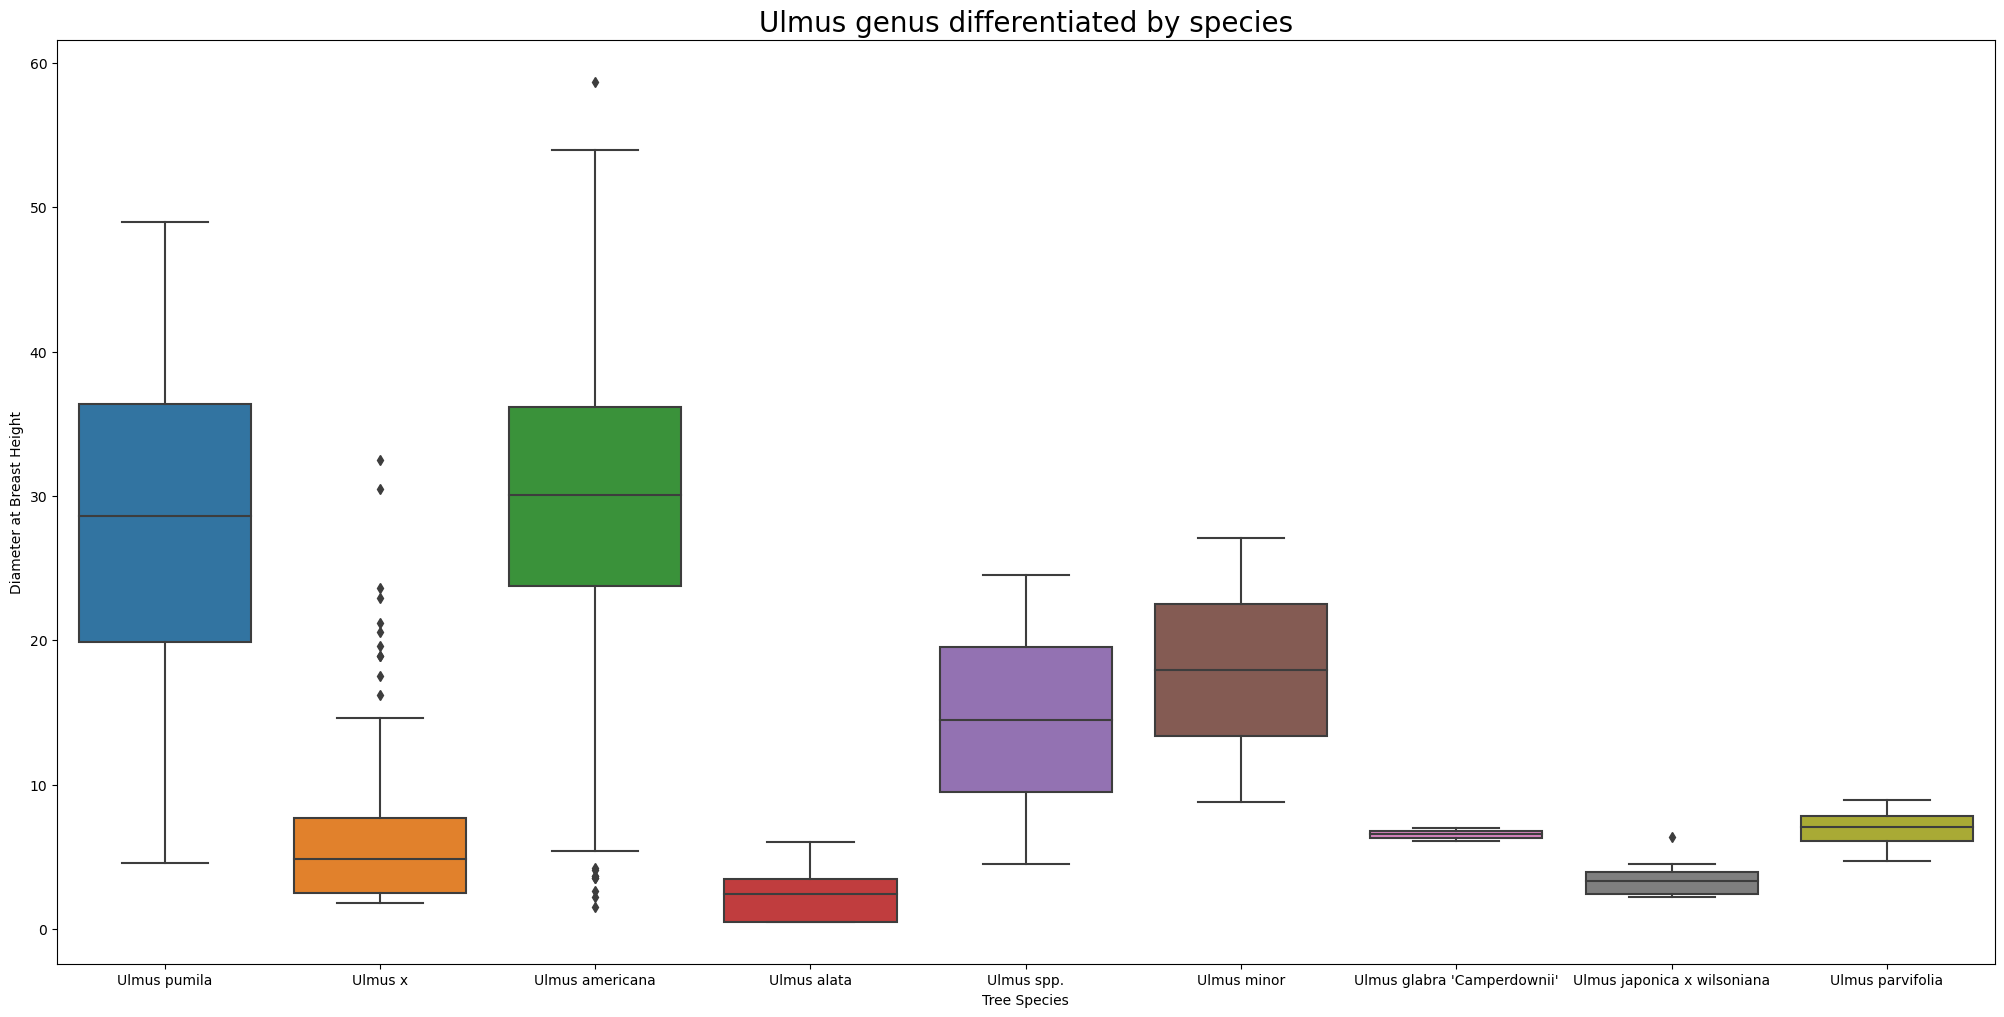

In [255]:
import pandas as pd
import seaborn as sns

#Use subset data from graph 1 (data=ulmus)

#Create a boxplot using Seaborn library
plt.rcParams['figure.figsize'] = [25, 12] #Change the default plot size.
boxplot = sns.boxplot(x='Genus_spec', y='DBH', data=ulmus)
boxplot.set_ylabel("Diameter at Breast Height")
boxplot.set_xlabel("Tree Species")
boxplot.set_title("Ulmus genus differentiated by species", fontsize=20, color="#000000")

**Graph 4:** Combine Graphs 1 and 3 into a single figure. **Do not plot a legend for any of the graphs**.

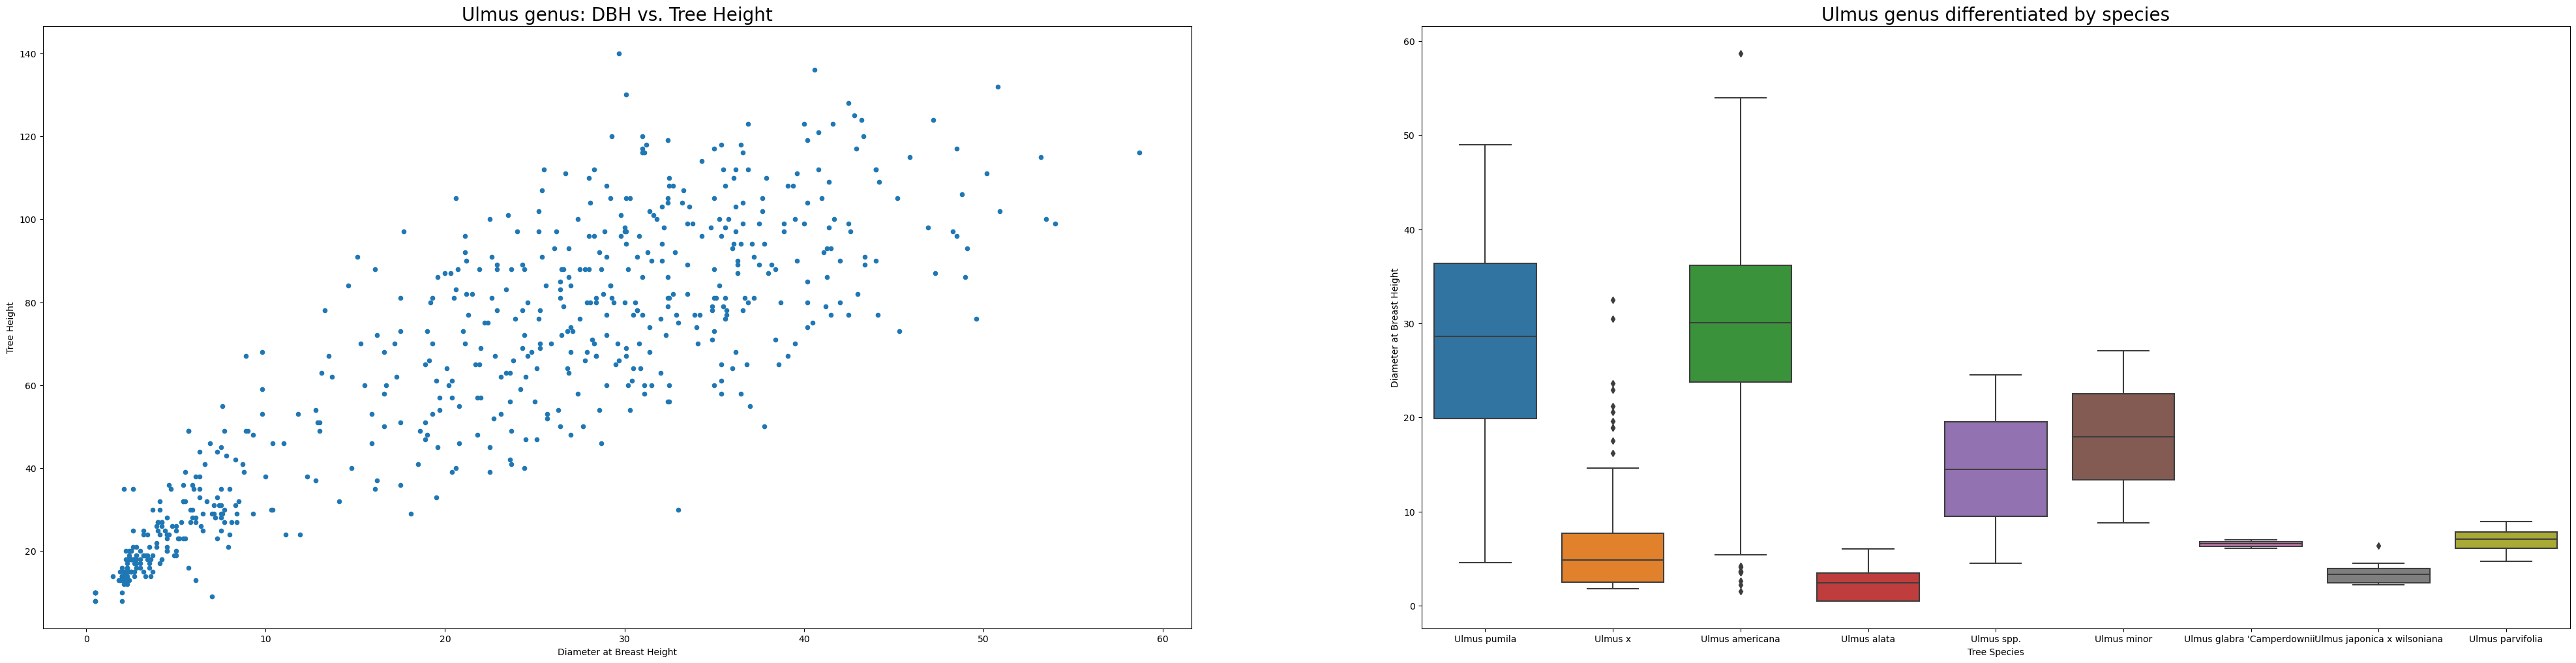

In [262]:
plt.rcParams['figure.figsize'] = [50, 12] #Change the default plot size.
fig, axs = plt.subplots(1, 2) #Create the subplots

#Plot the data from graph 1
ulmus_plot = ulmus.plot.scatter(x="DBH", y="TreeHeight", ax=axs[0]) #Add which axis to plot in
ulmus_plot.set_xlabel("Diameter at Breast Height")
ulmus_plot.set_ylabel("Tree Height")
ulmus_plot.set_title("Ulmus genus: DBH vs. Tree Height", fontsize=20, color="#000000")

#Plot the data from graph 3
plt.rcParams['figure.figsize'] = [25, 12] #Change the default plot size.
boxplot = sns.boxplot(x='Genus_spec', y='DBH', data=ulmus , ax=axs[1]) #Add which axis to plot in
boxplot.set_ylabel("Diameter at Breast Height")
boxplot.set_xlabel("Tree Species")
boxplot.set_title("Ulmus genus differentiated by species", fontsize=20, color="#000000")

plt.show()